<h3 align="right">mCP, &nbsp; dSPN, &nbsp; 160118_c8_D1, &nbsp; animal_1_n27_04102017_cel1 </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/animal_1_n27_04102017_cel1.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_546.soma.v': 'expdata/ECall_IV_ch5_546.dat',
    'IV_556.soma.v': 'expdata/ECall_IV_ch5_556.dat',    
    'IDthresh-sub_586.soma.v': 'expdata/ECall_IDthresh_ch5_586.dat',    
    'IDthresh_588.soma.v': 'expdata/ECall_IDthresh_ch5_588.dat',    
    'IDthresh_589.soma.v': 'expdata/ECall_IDthresh_ch5_589.dat',    
    'IDthresh_599.soma.v': 'expdata/ECall_IDthresh_ch5_599.dat',    
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/animal_1_n27_04102017_cel1.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.ba

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


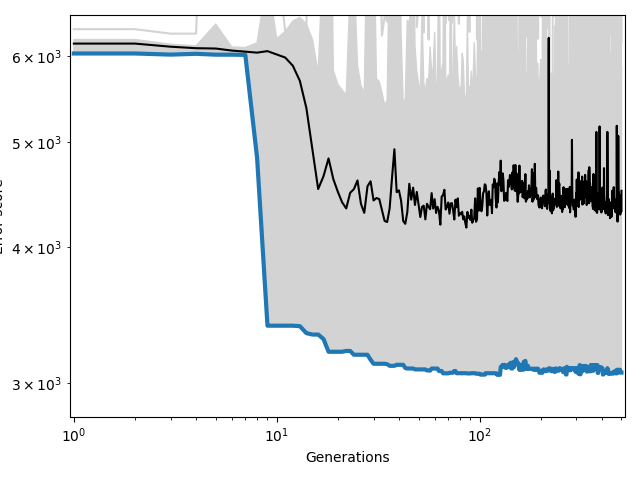

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,0.04013,0.03991,0.05957,0.07893,0.06202,0.04232,0.06669,0.04391,0.04044,0.0584
g_pas.somatic,0.0005096,0.0001101,0.0006124,8.699e-05,5.365e-05,0.001028,8.621e-05,7.433e-05,4.523e-05,9.409e-05
g_pas.basal,1.394e-05,3.616e-05,1.458e-05,1.045e-05,1.535e-05,1.051e-05,2.608e-05,2.967e-05,2.716e-05,1.309e-05
gbar_naf.axonal,10.05,7.484,0.6258,18.03,19.66,10.86,18.37,1.892,9.886,11.24
gbar_kas.axonal,0.7261,0.8714,0.9901,1,0.899,0.6862,0.6382,0.09754,0.6903,0.9978
gbar_Im.axonal,0.1879,0.2429,0.03833,0.2344,0.06214,0.124,0.07913,0.3207,0.2358,0.05538
gbar_naf.somatic,18.12,18.13,18.13,17.76,17.14,18.68,18.77,18.77,18.75,18.29
gbar_kaf.somatic,0.8711,0.8711,0.8823,0.8144,0.7508,0.8556,1.017,0.9658,1.005,0.8756
gbar_kas.somatic,0.0004416,0.00236,0.001215,4.181e-05,9.959e-05,0.0005379,7.049e-05,0.000115,0.002176,0.0002772
gbar_kdr.somatic,0.001044,1.852e-05,5.224e-05,0.003916,0.0005847,0.0008887,0.004877,0.001474,0.002347,0.0002611


<IPython.core.display.Javascript object>


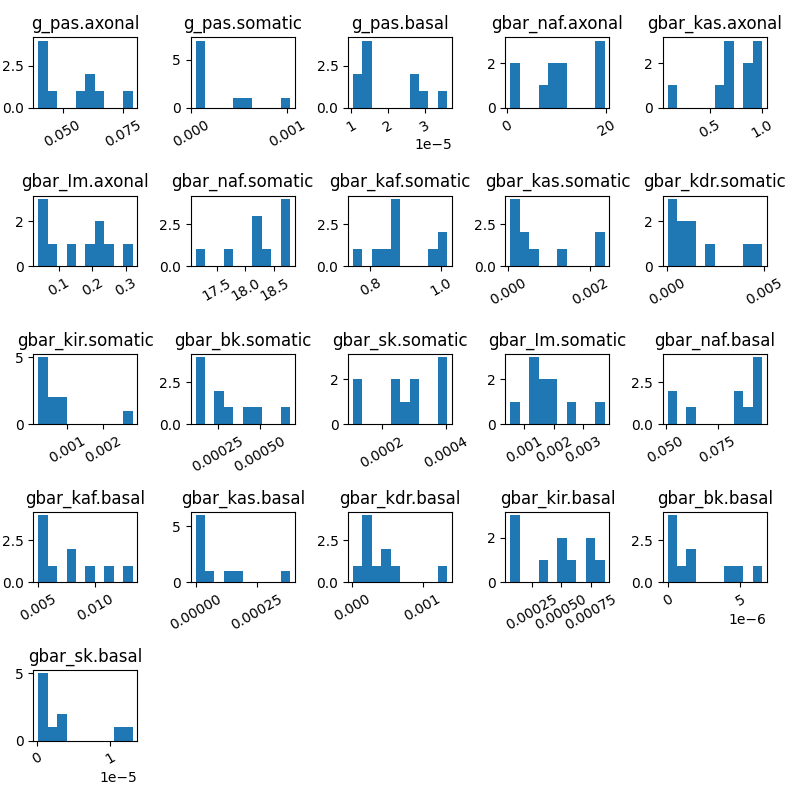

In [14]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


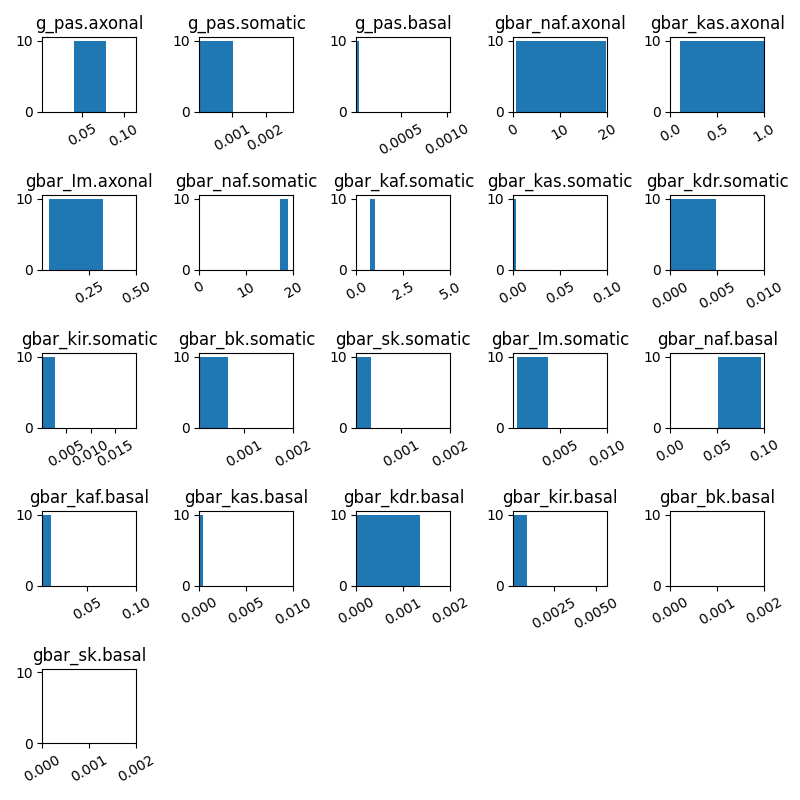

In [15]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [16]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


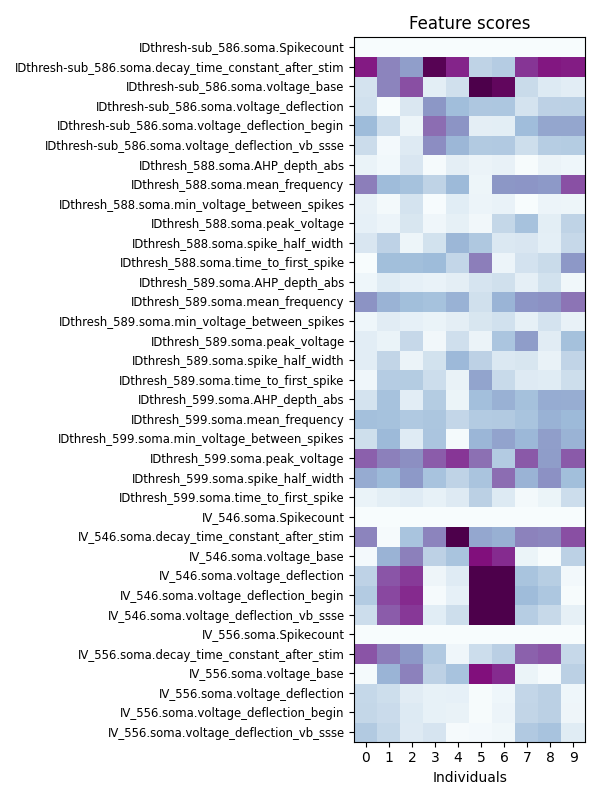

In [17]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [18]:
ind = 0
test_parameters = best_models[ind]
test_parameters

{'g_pas.axonal': 0.040131943590706765,
 'g_pas.somatic': 0.000509624126562785,
 'g_pas.basal': 1.3937935771030272e-05,
 'gbar_naf.axonal': 10.053965629850868,
 'gbar_kas.axonal': 0.7261299343531806,
 'gbar_Im.axonal': 0.1878796026759477,
 'gbar_naf.somatic': 18.117901447618895,
 'gbar_kaf.somatic': 0.8711069460575247,
 'gbar_kas.somatic': 0.00044159896388234424,
 'gbar_kdr.somatic': 0.0010439725565029188,
 'gbar_kir.somatic': 0.0004664292469044097,
 'gbar_bk.somatic': 0.0002509268328194606,
 'gbar_sk.somatic': 0.00039019143120681826,
 'gbar_Im.somatic': 0.0005302547325585031,
 'gbar_naf.basal': 0.05273656339926859,
 'gbar_kaf.basal': 0.011218195791744011,
 'gbar_kas.basal': 4.439888717526101e-06,
 'gbar_kdr.basal': 0.00047653514774169056,
 'gbar_kir.basal': 0.0005463500228210012,
 'gbar_bk.basal': 4.822002711012874e-06,
 'gbar_sk.basal': 6.325050079118923e-07}

In [19]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


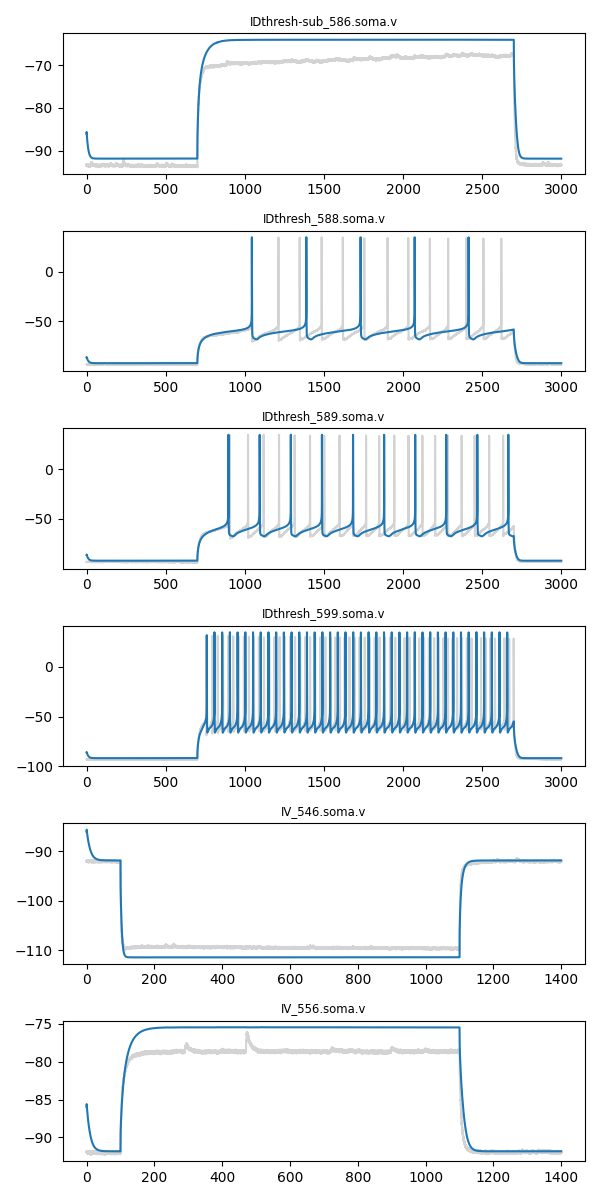

In [20]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


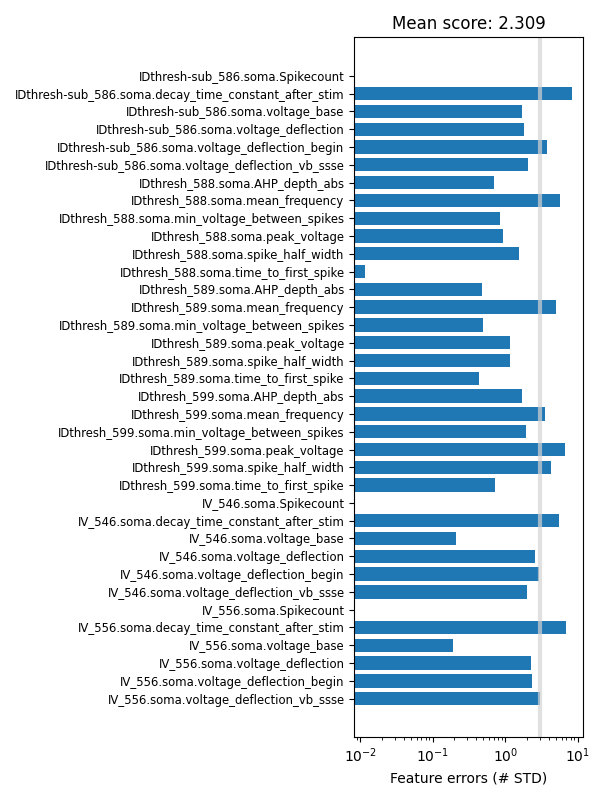

In [21]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [22]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.920000,2.330000,2.320000,1.960000,1.700000,2.260000,2.270000,2.000000,1.770000
1,1.920000,0.000000,2.290000,2.500000,2.050000,2.310000,2.360000,2.340000,1.750000,1.810000
2,2.330000,2.290000,0.000000,2.730000,2.530000,2.220000,2.470000,2.810000,2.650000,2.410000
3,2.320000,2.500000,2.730000,0.000000,2.120000,2.290000,2.040000,2.330000,2.310000,2.290000
4,1.960000,2.050000,2.530000,2.120000,0.000000,2.220000,2.010000,2.280000,2.160000,1.500000
5,1.700000,2.310000,2.220000,2.290000,2.220000,0.000000,2.480000,2.560000,2.200000,2.170000
6,2.260000,2.360000,2.470000,2.040000,2.010000,2.480000,0.000000,2.200000,2.400000,2.050000
7,2.270000,2.340000,2.810000,2.330000,2.280000,2.560000,2.200000,0.000000,2.040000,2.000000
8,2.000000,1.750000,2.650000,2.310000,2.160000,2.200000,2.400000,2.040000,0.000000,2.030000
9,1.770000,1.810000,2.410000,2.290000,1.500000,2.170000,2.050000,2.000000,2.030000,0.000000


In [23]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)

In [24]:
zscores = pandas.DataFrame(best_objectives).mean(axis=1)
print(f'Z-score mean {zscores.mean():.3f}, range {zscores.min():.3f}-{zscores.max():.3f}')

Z-score mean 4.798, range 2.309-22.570
